In [1]:
import Agents
import Markets

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

def add_price_data(df, t):
    
    pA_buy, pA_sell, pB_buy, pB_sell = df

    pA_buy[t] = agent_list[0].p_buy
    pA_sell[t] = agent_list[0].p_sell

    pB_buy[t] = agent_list[1].p_buy
    pB_sell[t] = agent_list[1].p_sell



In [2]:
def add_quant_data(df, t):

    QA_df, QB_df = df

    QA_df[t] = agent_list[0].Q
    QB_df[t] = agent_list[1].Q
    
    #print(agent_list[0].Q)
    
def add_deficit_data(df, t):

    DA_df, DB_df = df

    DA_df[t] = agent_list[0].D
    DB_df[t] = agent_list[1].D
    
def add_money_data(M_df, t):
    
    M_df[t,0] = agent_list[0].M
    M_df[t,1] = agent_list[1].M
    
def reset():
    
    agent_list[0].Q = QA
    agent_list[0].D = DA
    agent_list[1].Q = QB
    agent_list[1].D = DB
    
    market.reset()
    
    agent_list[0].p_buy = [p1buy_A_0, p2buy_A_0]#np.random.uniform(M, size=n) #[15, 10]
    agent_list[0].p_sell = [p1sell_A_0, p2sell_A_0]#np.random.uniform(M, size=n) #[25, 30]

    agent_list[1].p_buy = [p1buy_B_0, p2buy_B_0]#np.random.uniform(M, size=n) #[10, 15]
    agent_list[1].p_sell = [p1sell_B_0, p2sell_B_0]#np.random.uniform(M, size=n) #[30, 25]

In [3]:
def plot_market(i, *, ps=10, log=False):

    f, ax = plt.subplots(1, figsize=(10,4)) #(2,1)

    ax.plot(ME_df[:,i], c='C0', label=f'$\Delta M_{i}$')
    ax.plot(QE_df[:,i], c='C1', label=f'$\Delta Q_{i}$')
    ax.plot(ntries_df, c='k', label='Tries', lw='0.5')

    p = ME_df[:,i]/QE_df[:,i]
    ax.scatter(np.arange(0,T), p, c='g', label='f$p_{i}$', s=ps)

    ax.legend()
    
    if log:
        plt.yscale('log')
        
    plt.title(f'Market for Commodity {i}')
    plt.xlabel('t')
    plt.ylabel('$M$, $Q$')


def plot_prices(p_df, i, *, ps=10, log=False, includeM=True):

    'A sells i=0 and buys i=1, and vice versa for B'

    if i == 0:
        plt.plot(p_df[1][:,i], c='C0', ls='-.', label=f"A's Selling Price for {i}")
        plt.plot(p_df[2][:,i], c='C1', ls='-', label=f"B's Buying Price for {i}")

    elif i == 1:
        plt.plot(p_df[0][:,i], c='C0', ls='-', label=f"A's Buying Price for {i}")
        plt.plot(p_df[3][:,i], c='C1', ls='-.', label=f"B's Selling Price for {i}")

    if includeM:
        plt.plot(M_df[:,0], c='C0', ls=':', lw=0.5, label=f'$M_A$')
        plt.plot(M_df[:,1], c='C1', ls=':', lw=0.5, label=f'$M_B$')
    
    p = ME_df[:,i]/QE_df[:,i]
    plt.scatter(np.arange(T)+0.5, p, c='g', s=ps)
    
    plt.legend()
    
    if log:
        plt.yscale('log')

    plt.title(f'Market Prices for Commodity {i}')
    plt.xlabel('t')
    plt.ylabel('Prices')
    
def plot_quantities(Q_df, D_df, i):

    plt.plot(Q_df[0][:,i], c='C0', ls='-', label=f"A's Q{i}")
    plt.plot(D_df[0][:,i], c='C0', ls=':', label=f"A's D{i}")

    plt.plot(Q_df[1][:,i], c='C1', ls='-', label=f"B's Q{i}")
    plt.plot(D_df[1][:,i], c='C1', ls=':', label=f"B's D{i}")

    plt.legend()

    plt.title(f'Quantities for Commodity {i}')
    plt.xlabel('t')
    plt.ylabel('Q,D')


In [4]:
def run_simulation(T):

    reset()


    # Setup data
    pA_buy, pA_sell, pB_buy, pB_sell = np.zeros((T, 2)), np.zeros((T, 2)), np.zeros((T, 2)), np.zeros((T, 2))
    p_df = (pA_buy, pA_sell, pB_buy, pB_sell)

    QA_df, QB_df = np.zeros((T, 2)), np.zeros((T, 2))
    Q_df = (QA_df, QB_df)

    DA_df, DB_df = np.zeros((T, 2)), np.zeros((T, 2))
    D_df = (DA_df, DB_df)

    M_df = np.zeros((T,2))

    ME_df = np.zeros((T,2))
    QE_df = np.zeros((T,2))
    sE_df = np.zeros((T,2))
    ntries_df = []


    add_price_data(p_df, 0)
    add_quant_data(Q_df, 0)
    add_deficit_data(D_df, 0)
    add_money_data(M_df, 0)

    # Run market
    for t in range(T-1):

        # Market action occurs at half-time interval
        ME, QE, stn_dev, ntries = market.run_exchange(ExchangeDict)

        # Reset quantities
        agent_list[0].Q = np.array([QA1, QA2]) #QA_0 #*np.exp(-0.1*t)
        agent_list[1].Q = np.array([QB1, QB2]) #QB_0 #*np.exp(-0.1*t)
        #agent_list[0].D = DA.copy()#*t
        #agent_list[1].D = DB.copy()*t

        #print(QA, agent_list[0].Q)

        add_price_data(p_df, t+1)
        add_quant_data(Q_df, t+1)
        add_deficit_data(D_df, t+1)
        add_money_data(M_df, t+1)

        # Market action occurs at half-time interval
        ME_df[t] = ME
        QE_df[t] = QE
        sE_df[t] = stn_dev
        ntries_df.append(ntries)
        
    return ME_df, QE_df, p_df, M_df

In [5]:
N = 2
#M = 100/N

n = 2

QA1 = 100
QA2 = 0

QB1 = 0
QB2 = 100

QA_0 = np.array([QA1, QA2])
QB_0 = np.array([QB1, QB2])

QA = np.copy(QA_0)
QB = np.copy(QB_0)

DA = np.array([0, 50]).copy()
DB = np.array([50, 0]).copy()

cg = np.array([1, 1])

p1buy_A_0, p2buy_A_0 = 10,10
p1sell_A_0, p2sell_A_0 = 10,10

p1buy_B_0, p2buy_B_0 = 10,10
p1sell_B_0, p2sell_B_0 = 10,10

In [6]:
verbose = False

alpha = 0.1
beta = 0.1

gamma = 1.00
epsilon = 0.00
max_agent_tries = 100
max_tries = N*max_agent_tries
price_adjust_method = 'uniform'
min_price = 1e-5



In [7]:
alpha_list = np.logspace(-3, 1, 10)

M_list = np.logspace(-1, 3, 50)


In [8]:
T = 200 #200

price_df = np.zeros((len(M_list), 3))

for row_index, Mtot in enumerate(M_list):
    
    M = Mtot/N
    
    agent_list = [Agents.Agent(np.copy(QA_0), DA, M, n_actions=1, input_dims=[1]),
                  Agents.Agent(np.copy(QB_0), DB, M, n_actions=1, input_dims=[1])] 

    ExchangeDict = {agent_list[0]: 2, agent_list[1]: 2}

    market = Markets.Market(n, 
                        verbose=verbose, 
                        minimum_price=min_price, 
                        alpha=alpha, 
                        beta=beta, 
                        gamma=gamma, 
                        epsilon=epsilon, 
                        max_agent_tries=max_agent_tries, 
                        max_tries=max_tries,
                        price_adjust_method=price_adjust_method)


    ME_df, QE_df, _, M_df = run_simulation(T)

    p = ME_df/QE_df
    p = np.nanmean(p, axis=0)

    price_df[row_index, 0] = Mtot
    price_df[row_index, 1:] = p

C:\Users\Alex\Documents\Research\EconoNet\v1\Markets.py:244: RuntimeWarning: invalid value encountered in scalar divide
  _m = _P/_n
C:\Users\Alex\AppData\Local\Temp\ipykernel_9532\175812412.py:28: RuntimeWarning: invalid value encountered in divide
  p = ME_df/QE_df
C:\Users\Alex\Documents\Research\EconoNet\v1\Markets.py:419: RuntimeWarning: invalid value encountered in divide
  avg_price = self.monetary_exchanged/self.quantity_exchanged


In [9]:
#price_df

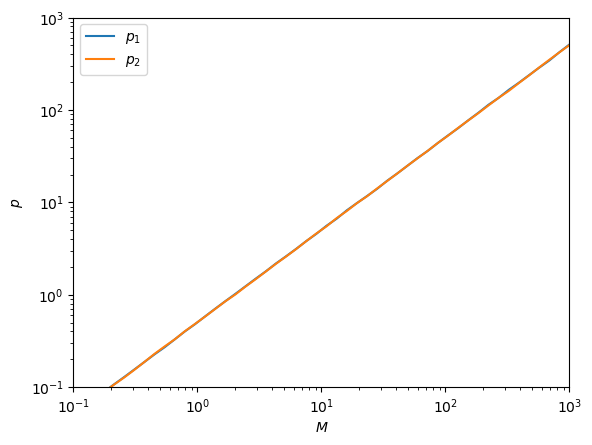

In [15]:
f, ax = plt.subplots()

#ax.plot(price_df[:,0], price_df[:, 0], c='k', ls='--')

for i in [1,2]:
    ax.plot(price_df[:,0], price_df[:, i], label=f'$p_{i}$')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel('$M$')
ax.set_ylabel('$p$')
ax.legend()

ax.set_xlim(1e-1, 1e3)
ax.set_ylim(1e-1, 1e3)

plt.show()
    

In [11]:
price_df

array([[1.00000000e-01, 5.09750421e-02, 5.05896688e-02],
       [1.20679264e-01, 6.03863815e-02, 6.08773399e-02],
       [1.45634848e-01, 7.35361775e-02, 7.31000088e-02],
       [1.75751062e-01, 8.85482802e-02, 8.80722539e-02],
       [2.12095089e-01, 1.06913997e-01, 1.06379698e-01],
       [2.55954792e-01, 1.28326204e-01, 1.26868902e-01],
       [3.08884360e-01, 1.54780484e-01, 1.53368818e-01],
       [3.72759372e-01, 1.86918800e-01, 1.86831963e-01],
       [4.49843267e-01, 2.25870062e-01, 2.28758997e-01],
       [5.42867544e-01, 2.69875547e-01, 2.75278790e-01],
       [6.55128557e-01, 3.28278156e-01, 3.28626682e-01],
       [7.90604321e-01, 4.00429188e-01, 4.01884055e-01],
       [9.54095476e-01, 4.79107361e-01, 4.82368403e-01],
       [1.15139540e+00, 5.82270119e-01, 5.79742713e-01],
       [1.38949549e+00, 7.05321921e-01, 7.01120453e-01],
       [1.67683294e+00, 8.51026040e-01, 8.47968196e-01],
       [2.02358965e+00, 1.02271176e+00, 1.00773960e+00],
       [2.44205309e+00, 1.23470

In [12]:
assert False

AssertionError: 

In [ ]:
plt.rcParams['figure.dpi'] = 100

In [ ]:
plot_market(0, log=True)

In [ ]:
plot_market(1, log=True)

In [ ]:
plot_prices(p_df, 0, log=True, includeM=True)

In [ ]:
plot_quantities(Q_df, D_df, 0)

In [ ]:
plot_prices(p_df, 1, log=True, includeM=True)
#plt.grid()

In [ ]:
plot_quantities(Q_df, D_df, 1)

This scheme won't work when the price is zero. 

Because $p' = p_0 (1+\alpha)$ will equal zero when $p_0$ is zero

In [ ]:
QA_0

In [ ]:
Q